In [ ]:
!pip install yfinance
!pip install pandas_ta

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(16,10)

In [ ]:
df=yf.download('CPALL.BK',period='max',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-14,3.000,3.10,2.775,2.80,1.610954,46761900
2003-10-15,2.850,2.90,2.825,2.85,1.639721,1126730000
2003-10-16,2.875,2.90,2.850,2.85,1.639721,661310000
2003-10-17,2.850,3.00,2.850,2.95,1.697255,971240000
2003-10-20,2.975,3.00,2.900,2.90,1.668488,228750000
...,...,...,...,...,...,...
2023-02-17,66.000,66.50,66.000,66.25,66.250000,7750500
2023-02-20,66.250,66.25,64.250,64.25,64.250000,43497700
2023-02-21,64.500,66.00,64.250,65.50,65.500000,40491400


In [ ]:
help(ta.bbands)

Help on function bbands in module pandas_ta.volatility.bbands:

bbands(close, length=None, std=None, ddof=0, mamode=None, talib=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)
    
    A popular volatility indicator by John Bollinger.
    
    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)
    
    Calculation:
        Default Inputs:
            length=5, std=2, mamode="sma", ddof=0
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length, ddof)
        if "ema":
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)
    
        LOWER = MID - std * stdev
        UPPER = MID + std * stdev
    
        BANDWIDTH = 100 * (UPPER - LOWER) / MID
        PERCENT = (close - LOWER) / (UPPER - LOWER)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period. Default: 5
        std (int): The long 

In [ ]:
df.ta.bbands()

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2003-10-14,NaN,NaN,NaN,NaN,NaN
2003-10-15,NaN,NaN,NaN,NaN,NaN
2003-10-16,NaN,NaN,NaN,NaN,NaN
2003-10-17,NaN,NaN,NaN,NaN,NaN
2003-10-20,2.768019,2.87,2.971980,7.106655,0.647088
...,...,...,...,...,...
2023-02-17,65.966905,66.55,67.133095,1.752352,0.242752
2023-02-20,64.211146,66.00,67.788854,5.420771,0.010860
2023-02-21,64.106832,65.75,67.393168,4.998229,0.423927


In [ ]:
df.ta.bbands(std=0.5)

,BBL_5_0.5,BBM_5_0.5,BBU_5_0.5,BBB_5_0.5,BBP_5_0.5
Date,,,,,
2003-10-14,NaN,NaN,NaN,NaN,NaN
2003-10-15,NaN,NaN,NaN,NaN,NaN
2003-10-16,NaN,NaN,NaN,NaN,NaN
2003-10-17,NaN,NaN,NaN,NaN,NaN
2003-10-20,2.844505,2.87,2.895495,1.776664,1.088350
...,...,...,...,...,...
2023-02-17,66.404226,66.55,66.695774,0.438088,-0.528992
2023-02-20,65.552786,66.00,66.447214,1.355193,-1.456559
2023-02-21,65.339208,65.75,66.160792,1.249557,0.195710


In [ ]:
df2 = df.copy()
df2.ta.bbands(length=10,std=2,append=True)
df2

,Open,High,Low,Close,Adj Close,Volume,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0,BBB_10_2.0,BBP_10_2.0
Date,,,,,,,,,,,
2003-10-14,3.000,3.10,2.775,2.80,1.610954,46761900,NaN,NaN,NaN,NaN,NaN
2003-10-15,2.850,2.90,2.825,2.85,1.639721,1126730000,NaN,NaN,NaN,NaN,NaN
2003-10-16,2.875,2.90,2.850,2.85,1.639721,661310000,NaN,NaN,NaN,NaN,NaN
2003-10-17,2.850,3.00,2.850,2.95,1.697255,971240000,NaN,NaN,NaN,NaN,NaN
2003-10-20,2.975,3.00,2.900,2.90,1.668488,228750000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,66.000,66.50,66.000,66.25,66.250000,7750500,66.114672,66.725,67.335328,1.829383,0.110865
2023-02-20,66.250,66.25,64.250,64.25,64.250000,43497700,64.871099,66.475,68.078901,4.825578,-0.193621
2023-02-21,64.500,66.00,64.250,65.50,65.500000,40491400,64.658847,66.350,68.041153,5.097674,0.248692


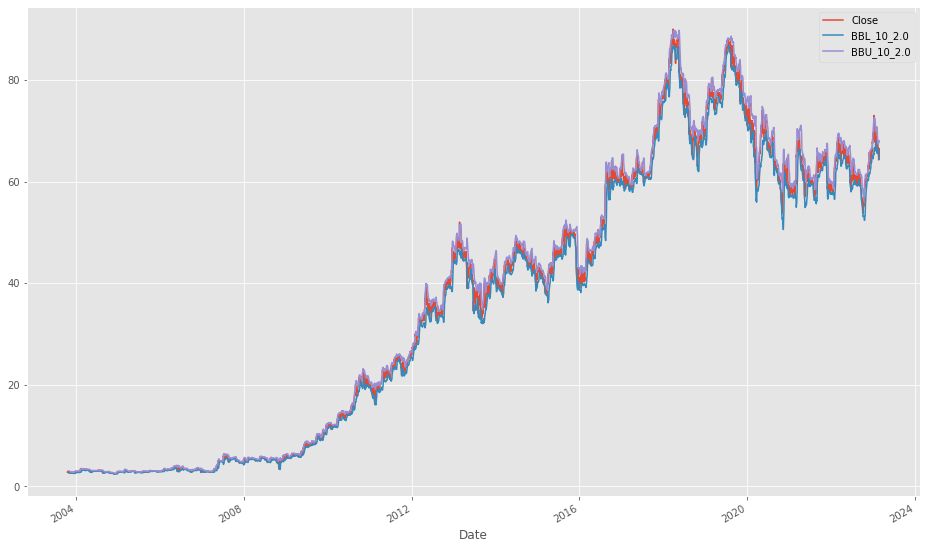

In [ ]:
df2.plot(y=['Close','BBL_10_2.0','BBU_10_2.0'])

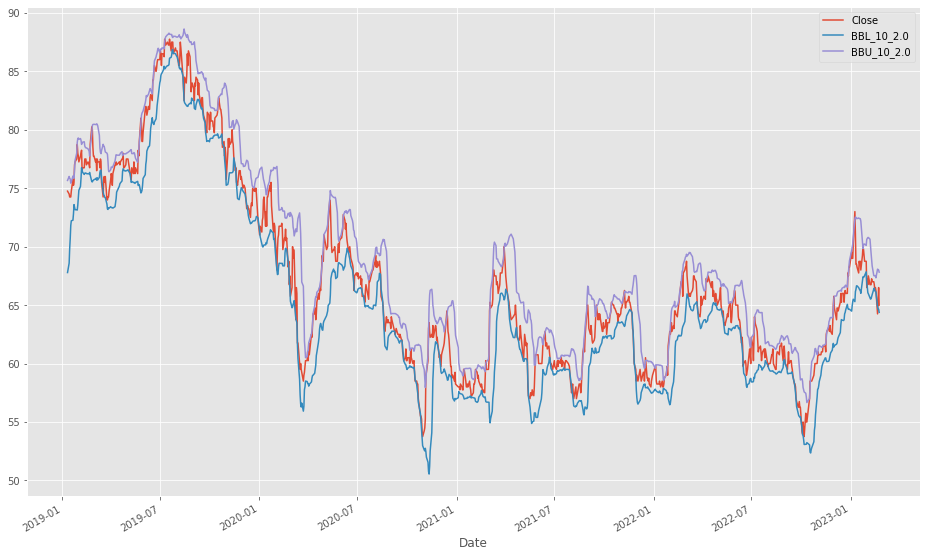

In [ ]:
df2.iloc[-1000:].plot(y=['Close','BBL_10_2.0','BBU_10_2.0'])

In [ ]:
df2['position']=np.where(df2['Close']>df2['BBU_10_2.0'],1,0)
df2['position']=np.where(df2['Close']<df2['BBU_10_2.0'],-1,df2['position'])
df2

,Open,High,Low,Close,Adj Close,Volume,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0,BBB_10_2.0,BBP_10_2.0,position
Date,,,,,,,,,,,,
2003-10-14,3.000,3.10,2.775,2.80,1.610954,46761900,NaN,NaN,NaN,NaN,NaN,0
2003-10-15,2.850,2.90,2.825,2.85,1.639721,1126730000,NaN,NaN,NaN,NaN,NaN,0
2003-10-16,2.875,2.90,2.850,2.85,1.639721,661310000,NaN,NaN,NaN,NaN,NaN,0
2003-10-17,2.850,3.00,2.850,2.95,1.697255,971240000,NaN,NaN,NaN,NaN,NaN,0
2003-10-20,2.975,3.00,2.900,2.90,1.668488,228750000,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,66.000,66.50,66.000,66.25,66.250000,7750500,66.114672,66.725,67.335328,1.829383,0.110865,-1
2023-02-20,66.250,66.25,64.250,64.25,64.250000,43497700,64.871099,66.475,68.078901,4.825578,-0.193621,-1
2023-02-21,64.500,66.00,64.250,65.50,65.500000,40491400,64.658847,66.350,68.041153,5.097674,0.248692,-1


In [ ]:
print(f'dadada {df2.iloc[-1,-1]}')

dadada -1


Define BB Breakout strategy

In [ ]:
def BBBreakout(ticker,interval='1d',start = '2013-08-31',end='2022-8-31', #yf
               bbandlength=20,m=2.0,shortable=True):#pandas_ta,m=std
  #buy/short when price moves outside of the upper band, Exit when price moves into the band.
  data= yf.download(ticker,interval=interval,start=start,end=end)
  data.ta.bbands(length=bbandlength,std=m,append=True)
  data['position']=np.where(data['Close']>data[f'BBU_{bbandlength}_{m}'],1,0)

  if shortable:
    data['position']=np.where(data['Close']<data[f'BBU_{bbandlength}_{m}'],-1,data['position'])

  data['position']=data['position'].fillna(0)
  return data


In [ ]:
df =BBBreakout('^SET.BK',interval='1d',bbandlength=20,m=0.5,shortable=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,BBL_20_0.5,BBM_20_0.5,BBU_20_0.5,BBB_20_0.5,BBP_20_0.5,position
Date,,,,,,,,,,,,
2013-09-02,1298.989990,1323.699951,1296.349976,1323.699951,1323.699951,7851000,NaN,NaN,NaN,NaN,NaN,0
2013-09-03,1323.109985,1334.150024,1312.630005,1315.410034,1315.410034,8755500,NaN,NaN,NaN,NaN,NaN,0
2013-09-04,1310.969971,1319.140015,1301.369995,1303.209961,1303.209961,5753000,NaN,NaN,NaN,NaN,NaN,0
2013-09-05,1309.030029,1326.560059,1306.479980,1313.489990,1313.489990,6175600,NaN,NaN,NaN,NaN,NaN,0
2013-09-06,1315.569946,1337.030029,1312.920044,1336.250000,1336.250000,6017600,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,1632.969971,1638.750000,1624.599976,1631.550049,1631.550049,5773200,1596.488055,1608.592999,1620.697943,1.505035,1.448251,1
2022-08-25,1638.510010,1646.550049,1636.910034,1643.520020,1643.520020,4883900,1601.426079,1612.753497,1624.080916,1.404730,1.858055,1
2022-08-26,1646.180054,1650.709961,1639.040039,1644.780029,1644.780029,4831300,1607.766620,1617.333496,1626.900372,1.183043,1.934456,1


In [ ]:
df[df['position']!=0]

,Open,High,Low,Close,Adj Close,Volume,BBL_20_0.5,BBM_20_0.5,BBU_20_0.5,BBB_20_0.5,BBP_20_0.5,position
Date,,,,,,,,,,,,
2013-09-27,1433.140015,1435.880005,1413.510010,1417.489990,1417.489990,10132600,1373.657348,1400.857013,1428.056678,3.883289,0.805757,-1
2013-09-30,1398.770020,1399.270020,1381.260010,1383.160034,1383.160034,7368500,1378.001511,1403.830017,1429.658523,3.679720,0.099861,-1
2013-10-01,1389.170044,1410.979980,1381.880005,1408.189941,1408.189941,7552400,1384.715211,1408.469012,1432.222814,3.372996,0.494126,-1
2013-10-02,1410.530029,1416.199951,1401.640015,1408.989990,1408.989990,6446700,1393.294394,1413.758014,1434.221634,2.894925,0.383500,-1
2013-10-03,1418.260010,1432.449951,1417.719971,1429.180054,1429.180054,9577300,1402.580894,1419.542517,1436.504140,2.389731,0.784098,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,1632.969971,1638.750000,1624.599976,1631.550049,1631.550049,5773200,1596.488055,1608.592999,1620.697943,1.505035,1.448251,1
2022-08-25,1638.510010,1646.550049,1636.910034,1643.520020,1643.520020,4883900,1601.426079,1612.753497,1624.080916,1.404730,1.858055,1
2022-08-26,1646.180054,1650.709961,1639.040039,1644.780029,1644.780029,4831300,1607.766620,1617.333496,1626.900372,1.183043,1.934456,1


Create signal

In [ ]:
action_data = df.copy()

In [ ]:
action_data['action_price']=action_data['Close']

In [ ]:
action_data = action_data[['Open','High','Low','Close','BBL_20_0.5','BBU_20_0.5','position','action_price']]
action_data

,Open,High,Low,Close,BBL_20_0.5,BBU_20_0.5,position,action_price
Date,,,,,,,,
2013-09-02,1298.989990,1323.699951,1296.349976,1323.699951,NaN,NaN,0,1323.699951
2013-09-03,1323.109985,1334.150024,1312.630005,1315.410034,NaN,NaN,0,1315.410034
2013-09-04,1310.969971,1319.140015,1301.369995,1303.209961,NaN,NaN,0,1303.209961
2013-09-05,1309.030029,1326.560059,1306.479980,1313.489990,NaN,NaN,0,1313.489990
2013-09-06,1315.569946,1337.030029,1312.920044,1336.250000,NaN,NaN,0,1336.250000
...,...,...,...,...,...,...,...,...
2022-08-24,1632.969971,1638.750000,1624.599976,1631.550049,1596.488055,1620.697943,1,1631.550049
2022-08-25,1638.510010,1646.550049,1636.910034,1643.520020,1601.426079,1624.080916,1,1643.520020
2022-08-26,1646.180054,1650.709961,1639.040039,1644.780029,1607.766620,1626.900372,1,1644.780029


In [ ]:
action_data = action_data.loc[action_data.position.shift(1)!=action_data['position']]
action_data

,Open,High,Low,Close,BBL_20_0.5,BBU_20_0.5,position,action_price
Date,,,,,,,,
2013-09-02,1298.989990,1323.699951,1296.349976,1323.699951,NaN,NaN,0,1323.699951
2013-09-27,1433.140015,1435.880005,1413.510010,1417.489990,1373.657348,1428.056678,-1,1417.489990
2013-10-10,1437.810059,1456.109985,1436.569946,1451.910034,1419.152355,1443.948670,1,1451.910034
2013-10-21,1484.869995,1485.670044,1446.400024,1448.540039,1424.719517,1449.946498,-1,1448.540039
2013-10-22,1447.239990,1457.489990,1438.640015,1457.359985,1426.728780,1451.896232,1,1457.359985
...,...,...,...,...,...,...,...,...
2022-06-09,1637.530029,1646.439941,1636.199951,1641.339966,1618.781405,1639.827592,1,1641.339966
2022-06-10,1637.359985,1640.859985,1631.430054,1632.619995,1619.902461,1640.634538,-1,1632.619995
2022-07-27,1557.109985,1576.780029,1555.640015,1576.410034,1546.397246,1560.769795,1,1576.410034


In [ ]:
action_data['helper']=action_data['position'].shift()
action_data

,Open,High,Low,Close,BBL_20_0.5,BBU_20_0.5,position,action_price,helper
Date,,,,,,,,,
2013-09-02,1298.989990,1323.699951,1296.349976,1323.699951,NaN,NaN,0,1323.699951,NaN
2013-09-27,1433.140015,1435.880005,1413.510010,1417.489990,1373.657348,1428.056678,-1,1417.489990,0.0
2013-10-10,1437.810059,1456.109985,1436.569946,1451.910034,1419.152355,1443.948670,1,1451.910034,-1.0
2013-10-21,1484.869995,1485.670044,1446.400024,1448.540039,1424.719517,1449.946498,-1,1448.540039,1.0
2013-10-22,1447.239990,1457.489990,1438.640015,1457.359985,1426.728780,1451.896232,1,1457.359985,-1.0
...,...,...,...,...,...,...,...,...,...
2022-06-09,1637.530029,1646.439941,1636.199951,1641.339966,1618.781405,1639.827592,1,1641.339966,-1.0
2022-06-10,1637.359985,1640.859985,1631.430054,1632.619995,1619.902461,1640.634538,-1,1632.619995,1.0
2022-07-27,1557.109985,1576.780029,1555.640015,1576.410034,1546.397246,1560.769795,1,1576.410034,-1.0


In [ ]:
action_data['return']=action_data['action_price'].pct_change()
action_data

,Open,High,Low,Close,BBL_20_0.5,BBU_20_0.5,position,action_price,helper,return
Date,,,,,,,,,,
2013-09-02,1298.989990,1323.699951,1296.349976,1323.699951,NaN,NaN,0,1323.699951,NaN,NaN
2013-09-27,1433.140015,1435.880005,1413.510010,1417.489990,1373.657348,1428.056678,-1,1417.489990,0.0,0.070854
2013-10-10,1437.810059,1456.109985,1436.569946,1451.910034,1419.152355,1443.948670,1,1451.910034,-1.0,0.024282
2013-10-21,1484.869995,1485.670044,1446.400024,1448.540039,1424.719517,1449.946498,-1,1448.540039,1.0,-0.002321
2013-10-22,1447.239990,1457.489990,1438.640015,1457.359985,1426.728780,1451.896232,1,1457.359985,-1.0,0.006089
...,...,...,...,...,...,...,...,...,...,...
2022-06-09,1637.530029,1646.439941,1636.199951,1641.339966,1618.781405,1639.827592,1,1641.339966,-1.0,0.005772
2022-06-10,1637.359985,1640.859985,1631.430054,1632.619995,1619.902461,1640.634538,-1,1632.619995,1.0,-0.005313
2022-07-27,1557.109985,1576.780029,1555.640015,1576.410034,1546.397246,1560.769795,1,1576.410034,-1.0,-0.034429


In [ ]:
action_data['Strategy_ret']=action_data['helper']*action_data['return']
action_data

,Open,High,Low,Close,BBL_20_0.5,BBU_20_0.5,position,action_price,helper,return,Strategy_ret
Date,,,,,,,,,,,
2013-09-02,1298.989990,1323.699951,1296.349976,1323.699951,NaN,NaN,0,1323.699951,NaN,NaN,NaN
2013-09-27,1433.140015,1435.880005,1413.510010,1417.489990,1373.657348,1428.056678,-1,1417.489990,0.0,0.070854,0.000000
2013-10-10,1437.810059,1456.109985,1436.569946,1451.910034,1419.152355,1443.948670,1,1451.910034,-1.0,0.024282,-0.024282
2013-10-21,1484.869995,1485.670044,1446.400024,1448.540039,1424.719517,1449.946498,-1,1448.540039,1.0,-0.002321,-0.002321
2013-10-22,1447.239990,1457.489990,1438.640015,1457.359985,1426.728780,1451.896232,1,1457.359985,-1.0,0.006089,-0.006089
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-09,1637.530029,1646.439941,1636.199951,1641.339966,1618.781405,1639.827592,1,1641.339966,-1.0,0.005772,-0.005772
2022-06-10,1637.359985,1640.859985,1631.430054,1632.619995,1619.902461,1640.634538,-1,1632.619995,1.0,-0.005313,-0.005313
2022-07-27,1557.109985,1576.780029,1555.640015,1576.410034,1546.397246,1560.769795,1,1576.410034,-1.0,-0.034429,0.034429


In [ ]:
action_data[action_data['Strategy_ret']!=0]

,Open,High,Low,Close,BBL_20_0.5,BBU_20_0.5,position,action_price,helper,return,Strategy_ret
Date,,,,,,,,,,,
2013-09-02,1298.989990,1323.699951,1296.349976,1323.699951,NaN,NaN,0,1323.699951,NaN,NaN,NaN
2013-10-10,1437.810059,1456.109985,1436.569946,1451.910034,1419.152355,1443.948670,1,1451.910034,-1.0,0.024282,-0.024282
2013-10-21,1484.869995,1485.670044,1446.400024,1448.540039,1424.719517,1449.946498,-1,1448.540039,1.0,-0.002321,-0.002321
2013-10-22,1447.239990,1457.489990,1438.640015,1457.359985,1426.728780,1451.896232,1,1457.359985,-1.0,0.006089,-0.006089
2013-10-25,1464.489990,1464.819946,1452.689941,1454.880005,1429.422434,1455.156570,-1,1454.880005,1.0,-0.001702,-0.001702
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-09,1637.530029,1646.439941,1636.199951,1641.339966,1618.781405,1639.827592,1,1641.339966,-1.0,0.005772,-0.005772
2022-06-10,1637.359985,1640.859985,1631.430054,1632.619995,1619.902461,1640.634538,-1,1632.619995,1.0,-0.005313,-0.005313
2022-07-27,1557.109985,1576.780029,1555.640015,1576.410034,1546.397246,1560.769795,1,1576.410034,-1.0,-0.034429,0.034429


In [ ]:
action_data = action_data[action_data['Strategy_ret']!=0].iloc[1:]

In [ ]:
action_data['Strategy_ret']+1

Date
2013-10-10    0.975718
2013-10-21    0.997679
2013-10-22    0.993911
2013-10-25    0.998298
2014-01-23    1.100723
                ...   
2022-06-09    0.994228
2022-06-10    0.994687
2022-07-27    1.034429
2022-08-29    1.031787
2022-08-30    0.992051
Name: Strategy_ret, Length: 233, dtype: float64

In [ ]:
strategy_cumret=(action_data['Strategy_ret']+1).cumprod()-1
strategy_cumret

Date
2013-10-10   -0.024282
2013-10-21   -0.026547
2013-10-22   -0.032474
2013-10-25   -0.034121
2014-01-23    0.063166
                ...   
2022-06-09    0.671796
2022-06-10    0.662914
2022-07-27    0.720167
2022-08-29    0.774846
2022-08-30    0.760737
Name: Strategy_ret, Length: 233, dtype: float64

In [ ]:
mu =action_data['Strategy_ret'].mean()
sigma = action_data['Strategy_ret'].std()
print(f'mean return:{mu:.2%}, sd:{sigma:.2%}')

mean return:0.28%, sd:2.65%


In [ ]:
action_data.reset_index(inplace=True)

In [ ]:
fig= px.line(y=strategy_cumret,x=action_data.index)
fig.update_layout(width=1000,height=600,
title='Strategy Cummulative Return',
xaxis_title = 'number of trades',
yaxis_title = 'Return',

yaxis = dict(tickformat ='.2%'),
showlegend=False
)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=strategy_cumret.index,y=strategy_cumret.values,
                         line=dict(width=1.5,color='red')))
fig.update_layout(width=1000,height=600,
      title='Strategy Cummulative Return',
      xaxis_title = 'number of trades',
      yaxis_title = 'Return',
      xaxis =dict(
          showline =True,
          showgrid=True,
          linecolor='black',
          tickfont = dict(
              family ='Calibri'
          )
      ),
      yaxis=dict(
           showline =True,
          showgrid=True,
          linecolor='black',
          tickfont = dict(
              family ='Times New Roman'
          )
      ),
      plot_bgcolor='white'
)
fig.show()


Monte carlo simulation simplify

In [ ]:
action_data['Strategy_ret']

0     -0.024282
1     -0.002321
2     -0.006089
3     -0.001702
4      0.100723
         ...   
228   -0.005772
229   -0.005313
230    0.034429
231    0.031787
232   -0.007949
Name: Strategy_ret, Length: 233, dtype: float64

In [ ]:
action_data[action_data['Strategy_ret']!=0]

,Date,Open,High,Low,Close,BBL_20_0.5,BBU_20_0.5,position,action_price,helper,return,Strategy_ret
0,2013-10-10,1437.810059,1456.109985,1436.569946,1451.910034,1419.152355,1443.948670,1,1451.910034,-1.0,0.024282,-0.024282
1,2013-10-21,1484.869995,1485.670044,1446.400024,1448.540039,1424.719517,1449.946498,-1,1448.540039,1.0,-0.002321,-0.002321
2,2013-10-22,1447.239990,1457.489990,1438.640015,1457.359985,1426.728780,1451.896232,1,1457.359985,-1.0,0.006089,-0.006089
3,2013-10-25,1464.489990,1464.819946,1452.689941,1454.880005,1429.422434,1455.156570,-1,1454.880005,1.0,-0.001702,-0.001702
4,2014-01-23,1292.719971,1312.180054,1288.709961,1308.339966,1266.079811,1296.125169,1,1308.339966,-1.0,-0.100723,0.100723
...,...,...,...,...,...,...,...,...,...,...,...,...
228,2022-06-09,1637.530029,1646.439941,1636.199951,1641.339966,1618.781405,1639.827592,1,1641.339966,-1.0,0.005772,-0.005772
229,2022-06-10,1637.359985,1640.859985,1631.430054,1632.619995,1619.902461,1640.634538,-1,1632.619995,1.0,-0.005313,-0.005313
230,2022-07-27,1557.109985,1576.780029,1555.640015,1576.410034,1546.397246,1560.769795,1,1576.410034,-1.0,-0.034429,0.034429
231,2022-08-29,1622.430054,1634.630005,1619.579956,1626.520020,1611.467824,1628.210167,-1,1626.520020,1.0,0.031787,0.031787


In [ ]:
action_data=action_data[action_data['Strategy_ret']!=0].iloc[1:]

In [ ]:
mu =action_data['Strategy_ret'].mean()
sigma=action_data['Strategy_ret'].std()

randomเลข0-1,10000ครั้ง

In [ ]:
simulation = np.random.normal(loc=mu, scale=sigma, size=(500,1000))
simulation = pd.DataFrame(simulation)
simulation.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
495,0.069627,0.035846,0.042918,0.022140,0.031162,0.004213,0.025616,0.008408,0.022128,-0.012517,...,0.035750,0.061523,-0.023064,-0.045549,0.001711,-0.002366,-0.026610,0.011225,-0.003181,0.037046
496,0.033523,-0.001178,-0.015132,-0.007498,0.039159,-0.000721,0.004272,0.019324,0.022313,0.010322,...,0.032280,-0.033095,0.011023,0.031555,-0.009641,0.036347,-0.002699,0.020651,0.041671,0.007367
497,0.004930,0.015348,-0.022580,-0.048061,0.005422,0.020799,-0.005292,-0.005172,0.004541,-0.035303,...,0.009832,0.036703,0.003628,0.051415,0.012496,0.048865,-0.017501,0.035594,-0.027588,0.025773
498,0.026750,0.024331,0.019424,0.015072,-0.002317,0.021263,-0.017052,-0.021494,-0.034127,-0.012249,...,-0.043446,-0.014718,0.000590,0.004732,-0.055161,0.012499,-0.034081,0.003155,0.005838,-0.003539
499,-0.033370,-0.028139,-0.074015,-0.007976,0.055833,0.002668,0.015623,-0.019047,0.026470,-0.009526,...,-0.063877,-0.052692,-0.002393,-0.005976,0.019492,0.033004,-0.003168,-0.006534,-0.035007,0.049900


In [ ]:
simulation.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.011493,-0.036549,0.016185,0.002680,-0.005341,-0.030418,-0.011974,0.005502,-0.006091,0.041618,...,-0.035463,0.002021,0.001375,-0.017656,0.052342,0.044203,-0.028944,0.021919,-0.032489,0.003438
1,-0.002883,-0.015998,0.008342,0.026349,0.040886,-0.016312,-0.000938,0.013272,-0.040357,0.049299,...,-0.011245,0.008592,-0.006518,0.024482,0.013251,0.040898,0.027057,-0.014043,-0.008015,0.014199
2,-0.024498,0.013316,-0.029049,0.013167,0.042611,0.027152,-0.030767,-0.009018,-0.045954,0.033965,...,0.031853,0.034156,-0.022131,0.031123,0.018983,-0.032744,0.033664,-0.034699,-0.014718,0.009774
3,0.027896,0.042529,0.009136,-0.009887,0.000611,0.004104,-0.015565,0.001159,-0.018535,0.015956,...,-0.051576,0.007432,-0.001909,-0.026984,-0.015100,0.036397,-0.023983,-0.060490,0.007982,0.009584
4,-0.045378,-0.049928,0.035312,0.013043,-0.003455,0.029347,-0.000553,0.021653,-0.025498,-0.010367,...,-0.009701,0.030567,-0.011857,0.010633,0.038959,-0.028465,-0.005512,-0.016701,0.016447,-0.005015


In [ ]:
simulation.iloc[0,:]=0

In [ ]:
last_day=(action_data['Strategy_ret']+1).cumprod().iloc[-1]
print(last_day)

1.8045562325241835


In [ ]:
(simulation+1).cumprod()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997117,0.984002,1.008342,1.026349,1.040886,0.983688,0.999062,1.013272,0.959643,1.049299,...,0.988755,1.008592,0.993482,1.024482,1.013251,1.040898,1.027057,0.985957,0.991985,1.014199
2,0.972690,0.997105,0.979050,1.039863,1.085239,1.010396,0.968324,1.004135,0.915543,1.084938,...,1.020249,1.043042,0.971495,1.056368,1.032486,1.006815,1.061632,0.951745,0.977384,1.024111
3,0.999824,1.039511,0.987995,1.029582,1.085903,1.014543,0.953252,1.005299,0.898574,1.102249,...,0.967629,1.050793,0.969640,1.027863,1.016896,1.043460,1.036170,0.894174,0.985186,1.033927
4,0.954454,0.987611,1.022882,1.043011,1.082151,1.044317,0.952725,1.027067,0.875662,1.090823,...,0.958242,1.082913,0.958143,1.038792,1.056512,1.013758,1.030459,0.879240,1.001389,1.028741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.021244,5.308764,2.864558,1.783827,12.724883,3.046967,1.977716,5.799474,3.537956,5.564773,...,3.894509,4.256481,1.217511,1.140366,1.568728,9.998124,6.093609,2.522528,1.216695,2.614603
496,3.122526,5.302509,2.821213,1.770452,13.223178,3.044769,1.986164,5.911546,3.616897,5.622215,...,4.020224,4.115615,1.230932,1.176350,1.553604,10.361522,6.077163,2.574620,1.267396,2.633865
497,3.137922,5.383894,2.757508,1.685362,13.294879,3.108097,1.975652,5.880974,3.633322,5.423732,...,4.059749,4.266670,1.235397,1.236832,1.573017,10.867839,5.970806,2.666260,1.232431,2.701749
498,3.221861,5.514892,2.811071,1.710764,13.264076,3.174184,1.941963,5.754566,3.509327,5.357295,...,3.883368,4.203873,1.236127,1.242685,1.486247,11.003681,5.767317,2.674672,1.239626,2.692187


In [ ]:
initial = 10000
startprice = last_day*initial

price_matrix = startprice*((simulation+1).cumprod())
price_matrix

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,...,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325,18045.562325
1,17993.533679,17756.873462,18196.096646,18521.040297,18783.364836,17751.197012,18028.635259,18285.060359,17317.304266,18935.183694,...,17842.634660,18200.611779,17927.935377,18487.361736,18284.682813,18783.593533,18533.814822,17792.154542,17900.919647,18301.782512
2,17552.731545,17993.315515,17667.513505,18764.903705,19583.751733,18233.170540,17473.948130,18120.173951,16521.496444,19578.310806,...,18410.974835,18822.271635,17531.171405,19062.747470,18631.787654,18168.534700,19157.740984,17174.782696,17637.448531,18480.665988
3,18042.383161,18758.561755,17828.916789,18579.383865,19595.724129,18307.999408,17201.970406,18141.182698,16215.270723,19890.706485,...,17461.410331,18962.151429,17497.706021,18548.360999,18350.451860,18829.820243,18698.272065,16135.879452,17778.233186,18657.788336
4,17223.662303,17821.987341,18458.489191,18821.722804,19528.028930,18845.279173,17192.460845,18533.999739,15801.807953,19684.508152,...,17292.022693,19541.775822,17290.229322,18745.586674,19065.361875,18293.836525,18595.209705,15866.386205,18070.623068,18564.213635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,54520.045760,95799.623291,51692.562075,32190.164764,229627.664851,54984.228422,35688.993268,104654.775869,63844.400369,100419.458175,...,70278.604493,76810.593563,21970.666839,20578.537638,28308.575321,180421.775271,109962.606003,45520.437611,21955.945410,47181.988617
496,56347.746222,95686.752848,50910.367741,31948.805254,238619.678204,54944.565553,35841.442726,106677.168767,65268.940412,101456.032895,...,72547.196150,74268.585019,22212.853291,21227.896389,28035.660587,186979.490233,109665.822052,46460.469278,22870.864908,47529.576950
497,56625.561764,97155.387938,49760.787039,30413.299691,239913.575156,56087.353918,35651.757080,106125.478358,65565.341085,97874.297629,...,73260.446136,76994.461955,22293.441038,22319.336232,28385.982521,196116.268059,107746.555316,48114.161185,22239.910746,48754.575816
498,58140.301394,99519.322041,50727.353845,30871.701683,239357.714327,57279.940971,35043.808815,103844.385434,63327.771220,96675.409760,...,70077.562615,75861.257605,22306.605239,22424.956374,26820.171073,198567.618427,104074.470286,48265.962844,22369.740495,48582.022434


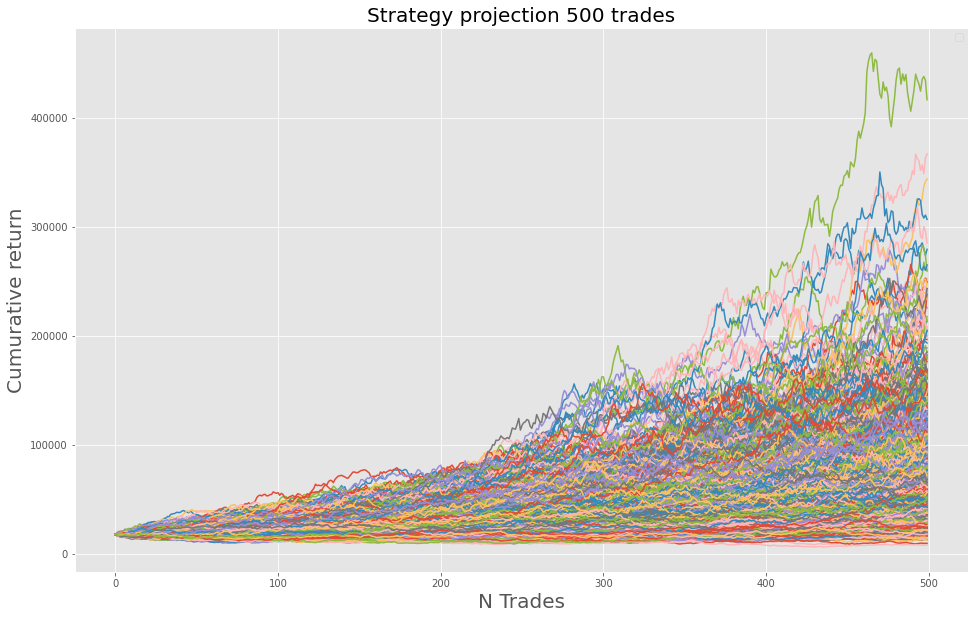

In [ ]:
plt.plot(price_matrix)
plt.title('Strategy projection 500 trades',size=20)
plt.xlabel('N Trades',size=20)
plt.ylabel('Cumurative return',size=20)
plt.legend()
plt.show()

In [ ]:
price_matrix['percentile_5']=np.percentile(price_matrix, 5, axis=1)
price_matrix['percentile_95']=np.percentile(price_matrix, 95, axis=1)
price_matrix['min']=np.min(price_matrix, axis=1)
price_matrix['max']=np.max(price_matrix, axis=1)

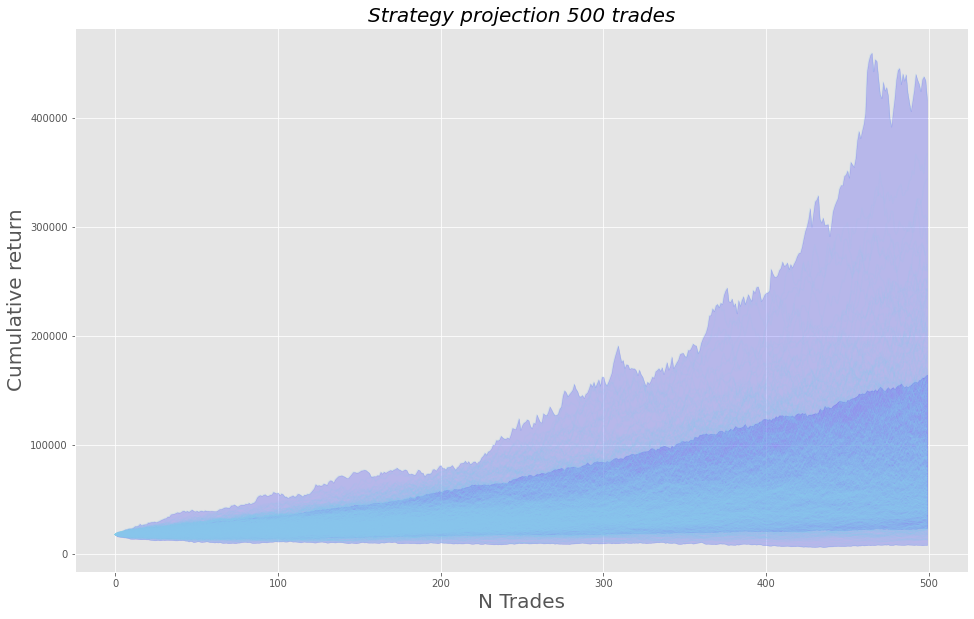

In [ ]:
plt.fill_between(price_matrix.index, price_matrix['percentile_5'], price_matrix['percentile_95'],color='blue',alpha=0.2)
plt.fill_between(price_matrix.index, price_matrix['min'], price_matrix['max'],color='blue',alpha=0.2)
plt.plot(price_matrix, lw=1, color='skyblue', alpha=0.1)
plt.title('Strategy projection 500 trades',size=20, fontstyle='italic')
plt.xlabel('N Trades',size=20)
plt.ylabel('Cumulative return',size=20)

plt.show()

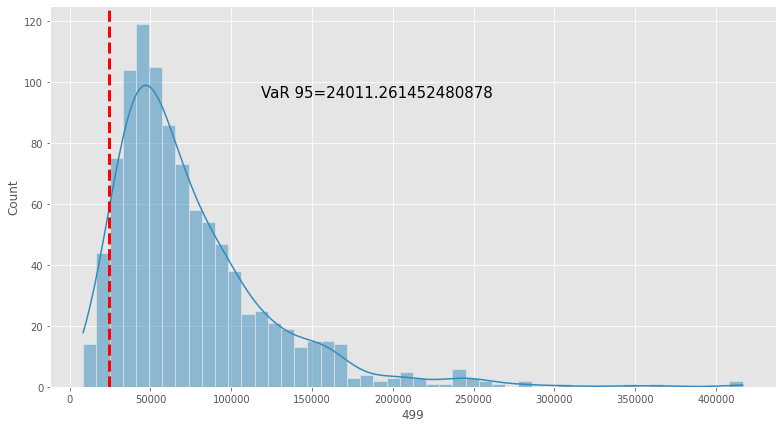

In [ ]:
var_95 = np.percentile(price_matrix.iloc[-1,:],5)
plt.figure(figsize =(13,7))
sns.histplot(price_matrix.iloc[-1,:],bins=50, kde=True)
plt.axvline(var_95,linewidth=3, color='r', linestyle='--')
plt.figtext(0.35,0.7,f'VaR 95={var_95}',fontsize=15);

In [ ]:
import scipy.stats as scs

percs = np.array([0.01, 0.1, 1., 2.5, 5.0, 10.0])
VaR = np.percentile(price_matrix.iloc[-1,:],percs)
def print_var():
  print('%16s %16s' %('Confidence Level','Value-at-Risk'))
  print(40*'-')
  for pair in zip(percs, VaR):
    print('%16.2f %16.3f' %(100-pair[0], pair[1]))

  print_var()

In [ ]:
price_matrix_sim = price_matrix[['percentile_5','percentile_95','min','max']]
price_matrix_sim

,percentile_5,percentile_95,min,max
0,18045.562325,18045.562325,18045.562325,18045.562325
1,17316.840681,18907.341864,16294.955671,19719.435290
2,17094.067518,19224.644270,16020.289532,20662.116376
3,16805.790457,19548.897747,15760.895372,20802.129418
4,16623.284319,19883.366282,15653.957381,20844.526720
...,...,...,...,...
495,23763.080302,159769.508315,8314.137982,424445.827831
496,23727.229022,161963.805581,8119.103977,435384.960490
497,23593.358966,161761.468895,8282.239961,437936.528392
498,23879.431974,163392.399690,8374.155633,434424.917632


In [ ]:
strat_cumret= (action_data['Strategy_ret']+1).cumprod()-1
(strat_cumret+1)*initial

1       9976.789229
2       9916.042033
3       9899.167966
4      10896.242952
5      10731.759099
           ...     
228    17134.009909
229    17042.981806
230    17629.759711
231    18190.164036
232    18045.562325
Name: Strategy_ret, Length: 232, dtype: float64

In [ ]:
cone =pd.concat([(strat_cumret+1)*initial,price_matrix_sim],ignore_index=True)

In [ ]:
cone

,0,max,min,percentile_5,percentile_95
0,9976.789229,NaN,NaN,NaN,NaN
1,9916.042033,NaN,NaN,NaN,NaN
2,9899.167966,NaN,NaN,NaN,NaN
3,10896.242952,NaN,NaN,NaN,NaN
4,10731.759099,NaN,NaN,NaN,NaN
...,...,...,...,...,...
727,NaN,424445.827831,8314.137982,23763.080302,159769.508315
728,NaN,435384.960490,8119.103977,23727.229022,161963.805581
729,NaN,437936.528392,8282.239961,23593.358966,161761.468895
730,NaN,434424.917632,8374.155633,23879.431974,163392.399690


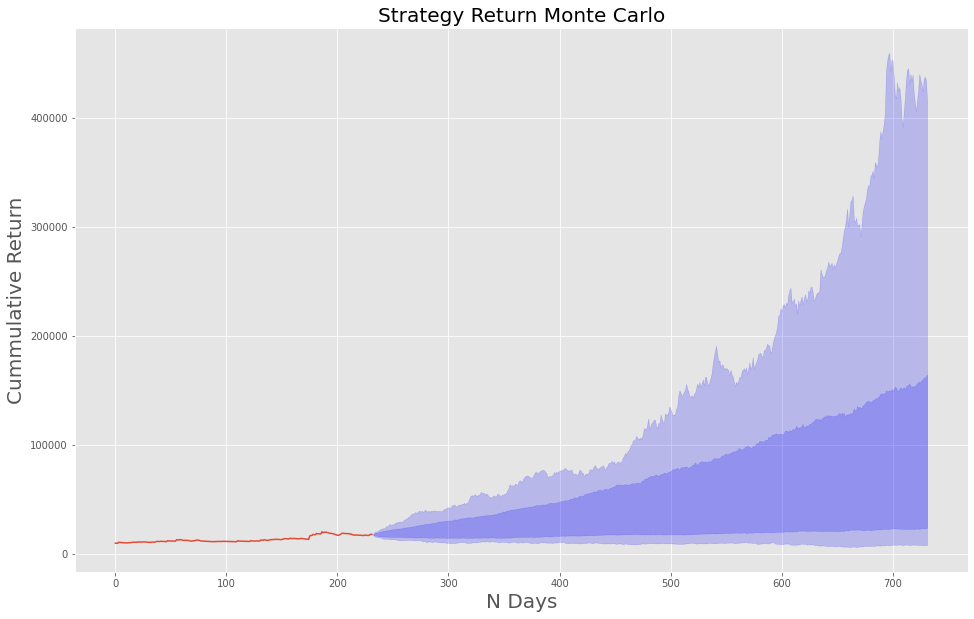

In [ ]:
plt.plot(cone[0])
plt.fill_between(cone.index, cone['percentile_5'], cone['percentile_95'], color='blue', alpha=0.2)
plt.fill_between(cone.index, cone['min'], cone['max'],color='blue',alpha=0.2)
plt.title('Strategy Return Monte Carlo', size=20)
plt.xlabel('N Days', size =20)
plt.ylabel('Cummulative Return', size = 20)
#plt.axhline(var_95, linewidth=2, color='r', ;inestyle='--',)
#plt.figtext(0.15, 0.45, f'VaR 95 ={var_95}', fontsize =15)
plt.show()

In [ ]:
cone_full = pd.concat([(strat_cumret+1)*initial,price_matrix_sim],ignore_index=True)

In [ ]:
cone= cone_full.iloc[:300]
cone

,0,max,min,percentile_5,percentile_95
0,9976.789229,NaN,NaN,NaN,NaN
1,9916.042033,NaN,NaN,NaN,NaN
2,9899.167966,NaN,NaN,NaN,NaN
3,10896.242952,NaN,NaN,NaN,NaN
4,10731.759099,NaN,NaN,NaN,NaN
...,...,...,...,...,...
295,NaN,40307.411748,10614.220151,15157.880818,29992.520895
296,NaN,41404.637293,10990.288191,15036.197569,30483.622501
297,NaN,41330.314351,10616.553038,15097.055920,30426.910403
298,NaN,42100.440021,10211.409078,14905.472665,30182.783238


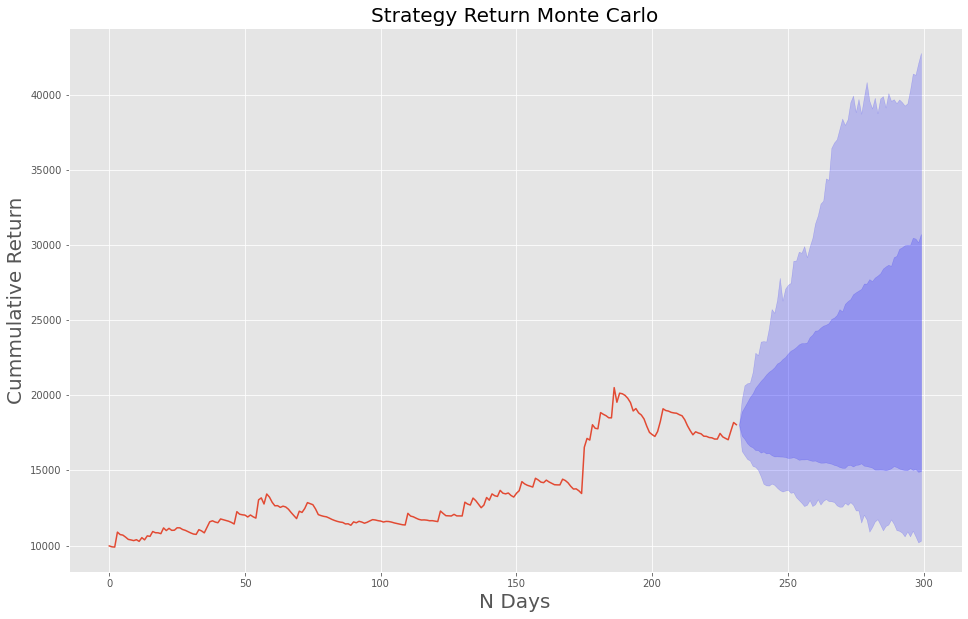

In [ ]:
plt.plot(cone[0])
plt.fill_between(cone.index, cone['percentile_5'], cone['percentile_95'], color='blue', alpha=0.2)
plt.fill_between(cone.index, cone['min'], cone['max'],color='blue',alpha=0.2)
plt.title('Strategy Return Monte Carlo', size=20)
plt.xlabel('N Days', size =20)
plt.ylabel('Cummulative Return', size = 20)
#plt.axhline(var_95, linewidth=2, color='r', ;inestyle='--',)
#plt.figtext(0.15, 0.45, f'VaR 95 ={var_95}', fontsize =15)
plt.show()

In [ ]:
(df2['BBU_10_2.0']-df2['BBL_10_2.0'])/df2['BBM_10_2.0']

Date
2003-10-14         NaN
2003-10-15         NaN
2003-10-16         NaN
2003-10-17         NaN
2003-10-20         NaN
                ...   
2023-02-17    0.018294
2023-02-20    0.048256
2023-02-21    0.050977
2023-02-22    0.050481
2023-02-23    0.052056
Length: 4746, dtype: float64